#IMPORT DATASET

In [28]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train (1).csv


#READ DATASET

In [29]:
import numpy as np
import pandas as pd
df_train=pd.read_csv('train.csv')
df_train.head()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [30]:
print(f"Kita memiliki {df_train.shape[0]} baris dan {df_train.shape[1]} kolom pada dataset.")

Kita memiliki 4250 baris dan 20 kolom pada dataset.


#EXPLORATORY DATA ANALYSIS (EDA)

##Missing Value Detection

In [31]:
def missing (df_train):
    missing_number = df_train.isnull().sum().sort_values(ascending=False)
    missing_percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['jumlah_missing', 'presentase_missing'])
    return missing_values
missing(df_train)

,jumlah_missing,presentase_missing
state,0,0.0
account_length,0,0.0
number_customer_service_calls,0,0.0
total_intl_charge,0,0.0
total_intl_calls,0,0.0
total_intl_minutes,0,0.0
total_night_charge,0,0.0
total_night_calls,0,0.0
total_night_minutes,0,0.0
total_eve_charge,0,0.0


##Duplicate Data Detection


In [32]:
df_train.duplicated().sum()

0

##Dropping

In [33]:
df_train.drop(columns=['state'], inplace=True)

##Filtering Categorical and Numerical Variables

In [34]:
df_train.head()

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [35]:
df_train.columns

Index(['account_length', 'area_code', 'international_plan', 'voice_mail_plan',
       'number_vmail_messages', 'total_day_minutes', 'total_day_calls',
       'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
       'total_eve_charge', 'total_night_minutes', 'total_night_calls',
       'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge', 'number_customer_service_calls', 'churn'],
      dtype='object')

In [36]:
category_columns = []
for col in df_train.columns:
	if df_train[col].nunique()<10:
		category_columns.append(col) 
print('category data columns are {}'.format(category_columns))
numeric_columns = ['number_vmail_messages' ,'total_day_minutes' ,'total_day_calls',
       'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
       'total_eve_charge', 'total_night_minutes', 'total_night_calls',
       'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge' ]
print('numeric data columns are {}'.format(numeric_columns))

category data columns are ['area_code', 'international_plan', 'voice_mail_plan', 'churn']
numeric data columns are ['number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge']


##Data Visualization

###Categorical Variables

In [37]:
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [38]:
df_train.churn.value_counts()

no     3652
yes     598
Name: churn, dtype: int64

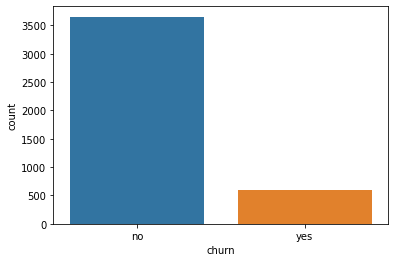

In [39]:
sns.countplot(x = 'churn', data =df_train)
plt.show()

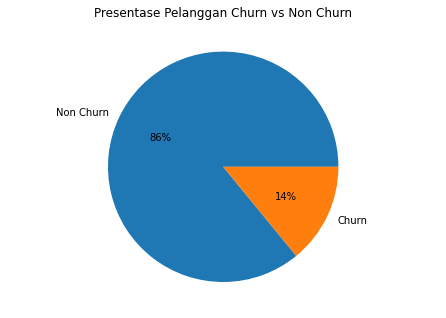

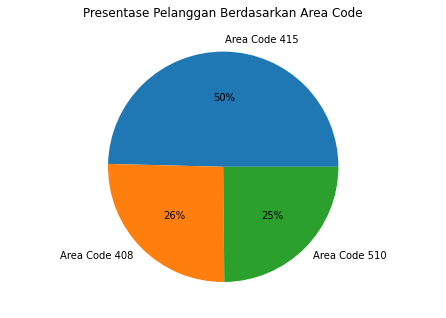

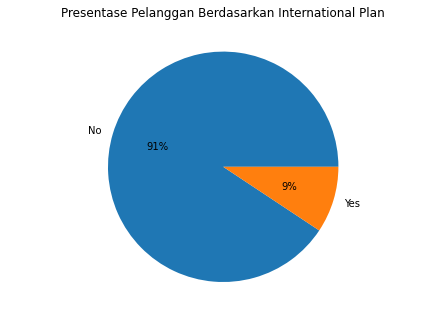

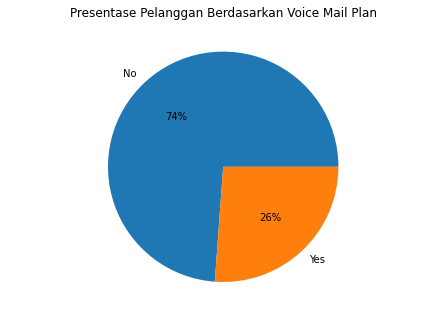

In [40]:
#Churn
fig=plt.figure(0)   
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['Non Churn','Churn']
churn = df_train['churn'].value_counts()
ax.pie(churn, labels=labels, autopct='%.0f%%')
ax.set_title('Presentase Pelanggan Churn vs Non Churn')

#Area Code
fig=plt.figure(1)   
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['Area Code 415','Area Code 408','Area Code 510']
area_code = df_train['area_code'].value_counts()
ax.pie(area_code, labels=labels, autopct='%.0f%%')
ax.set_title('Presentase Pelanggan Berdasarkan Area Code')

#International Plan
fig = plt.figure(2)
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['No','Yes']
international_plan = df_train['international_plan'].value_counts()
ax.pie(international_plan, labels=labels, autopct='%.0f%%')
ax.set_title('Presentase Pelanggan Berdasarkan International Plan')

#Voice Mail Plan
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['No','Yes']
voice_mail_plan = df_train['voice_mail_plan'].value_counts()
ax.pie(voice_mail_plan, labels=labels, autopct='%.0f%%')
ax.set_title('Presentase Pelanggan Berdasarkan Voice Mail Plan')
plt.show()

###Numerical Variables

In [41]:
colours = ['forestgreen','dodgerblue','goldenrod', 'coral' , 'silver' , 'gold' , 'dodgerblue' , 'forestgreen','dodgerblue','goldenrod', 'coral' , 'silver' , 'gold' ];

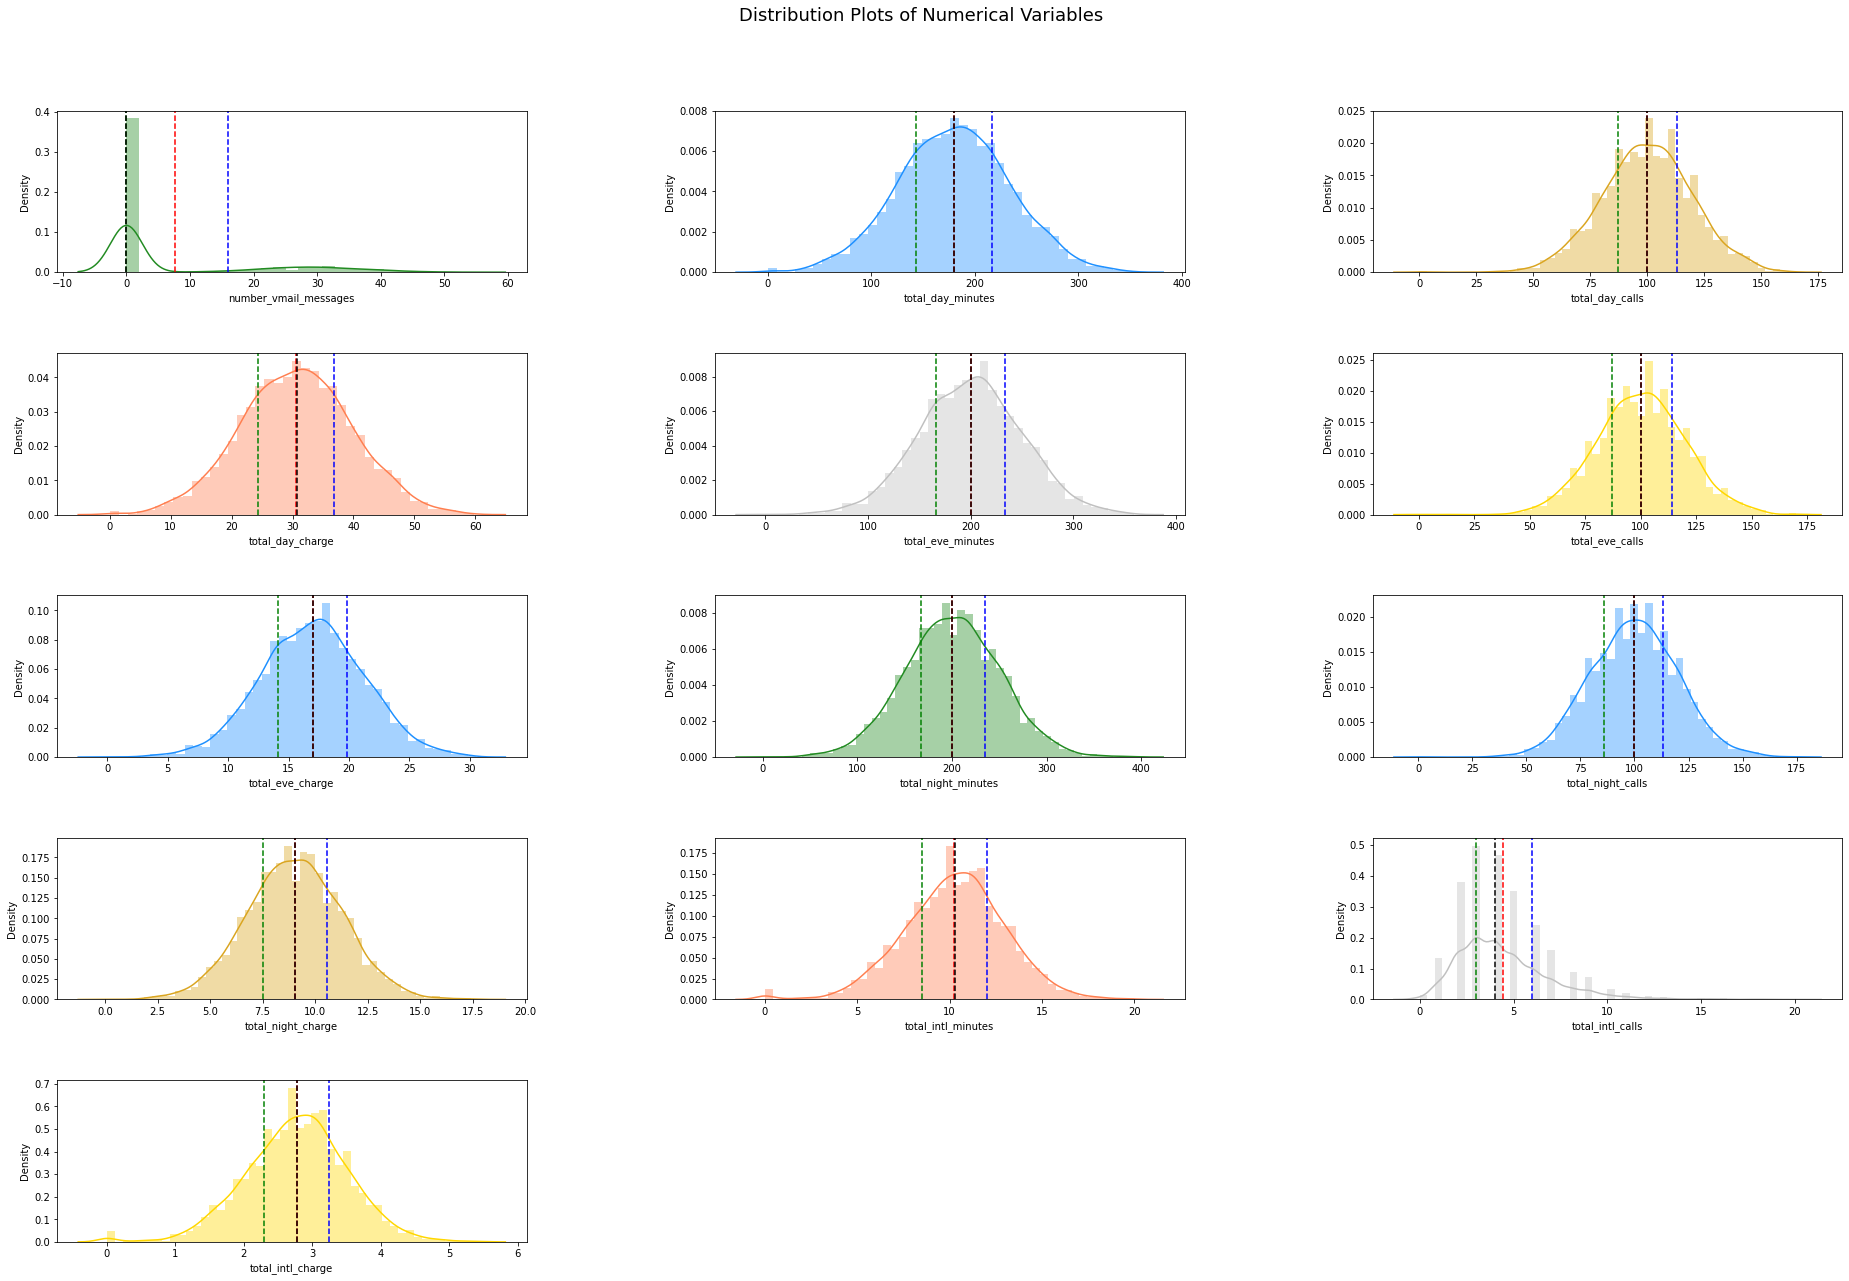

In [42]:
fig = plt.figure(figsize=[32,24])
fig.suptitle('Distribution Plots of Numerical Variables', fontsize=18)
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(numeric_columns):
    ax = fig.add_subplot(6, 3, i+1)
    ax = sns.distplot(df_train[col],  color=colours[i]) 
    ax.axvline(df_train[col].quantile(q=0.25),color='green',linestyle='--',label='25% Quartile')
    ax.axvline(df_train[col].mean(),color='red',linestyle='--',label='Mean')
    ax.axvline(df_train[col].median(),color='black',linestyle='--',label='Median')
    ax.axvline(df_train[col].quantile(q=0.75),color='blue',linestyle='--',label='75% Quartile')
    # # ax.text('skewness: {}' .format(str(round(df[col].skew(),3))), ha='right', va='center', size=11)
    # ax.set_xlabel(f'{col}', fontdict=axlab_dict)
    # ax.set_title(f'{col.upper()}    skewness {round(df[col].skew(),3)}', fontdict=axtitle_dict)
    # ax.legend(fontsize=10)

###Bivariate Analysis

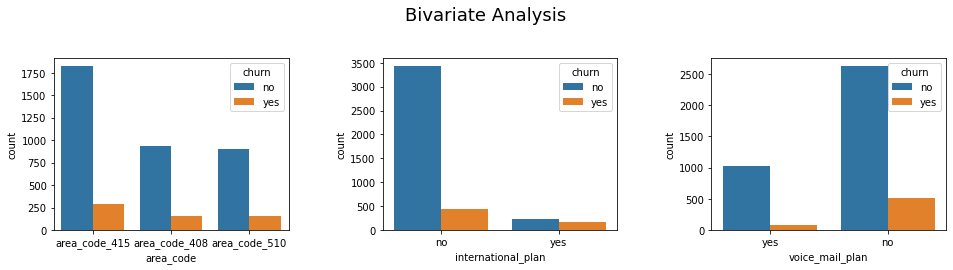

In [43]:
fig = plt.figure(figsize=[16,12])
fig.suptitle('Bivariate Analysis', fontsize=18)
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(category_columns[0:3]):
    a = fig.add_subplot(3, 3, i+1)
    a=sns.countplot(x = df_train[col] , ax=a , hue = df_train['churn'] )

###Correlation Analysis

In [44]:
df_train.corr()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
account_length,1.000000,-0.006626,-0.001612,0.023002,-0.001613,-0.010326,0.005535,-0.010322,-0.009916,-0.001846,-0.009942,0.004539,0.013690,0.004494,0.001002
number_vmail_messages,-0.006626,1.000000,0.002000,-0.006920,0.001994,0.010725,0.003593,0.010736,0.018308,0.001977,0.018300,0.005220,0.006585,0.005249,-0.015303
total_day_minutes,-0.001612,0.002000,1.000000,0.000747,1.000000,-0.013248,0.005986,-0.013258,0.010049,-0.004812,0.010036,-0.021369,0.003859,-0.021291,-0.002925
total_day_calls,0.023002,-0.006920,0.000747,1.000000,0.000751,0.008661,0.003739,0.008663,0.002206,-0.004815,0.002200,0.008834,0.009377,0.008909,-0.015845
total_day_charge,-0.001613,0.001994,1.000000,0.000751,1.000000,-0.013247,0.005985,-0.013257,0.010053,-0.004816,0.010040,-0.021374,0.003853,-0.021296,-0.002932
total_eve_minutes,-0.010326,0.010725,-0.013248,0.008661,-0.013247,1.000000,0.003101,1.000000,-0.014018,0.011973,-0.014031,-0.003509,0.012239,-0.003460,-0.010063
total_eve_calls,0.005535,0.003593,0.005986,0.003739,0.005985,0.003101,1.000000,0.003120,0.008425,-0.011929,0.008441,-0.013096,0.004949,-0.013145,0.006956
total_eve_charge,-0.010322,0.010736,-0.013258,0.008663,-0.013257,1.000000,0.003120,1.000000,-0.014022,0.011971,-0.014035,-0.003512,0.012239,-0.003463,-0.010071
total_night_minutes,-0.009916,0.018308,0.010049,0.002206,0.010053,-0.014018,0.008425,-0.014022,1.000000,0.023815,0.999999,-0.000113,-0.024280,-0.000047,-0.013771
total_night_calls,-0.001846,0.001977,-0.004812,-0.004815,-0.004816,0.011973,-0.011929,0.011971,0.023815,1.000000,0.023798,0.001093,0.003851,0.001054,-0.008893


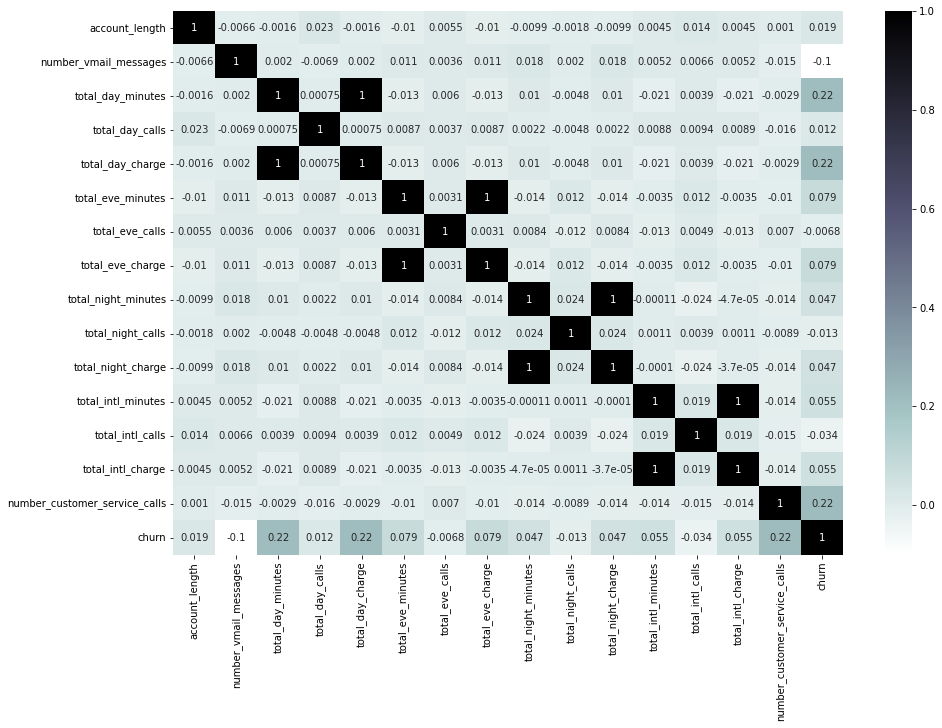

In [45]:
df_train['churn']=df_train['churn'].astype('category').cat.codes
corr = df_train.corr()
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corr, cmap='bone_r', annot=True, ax=ax);

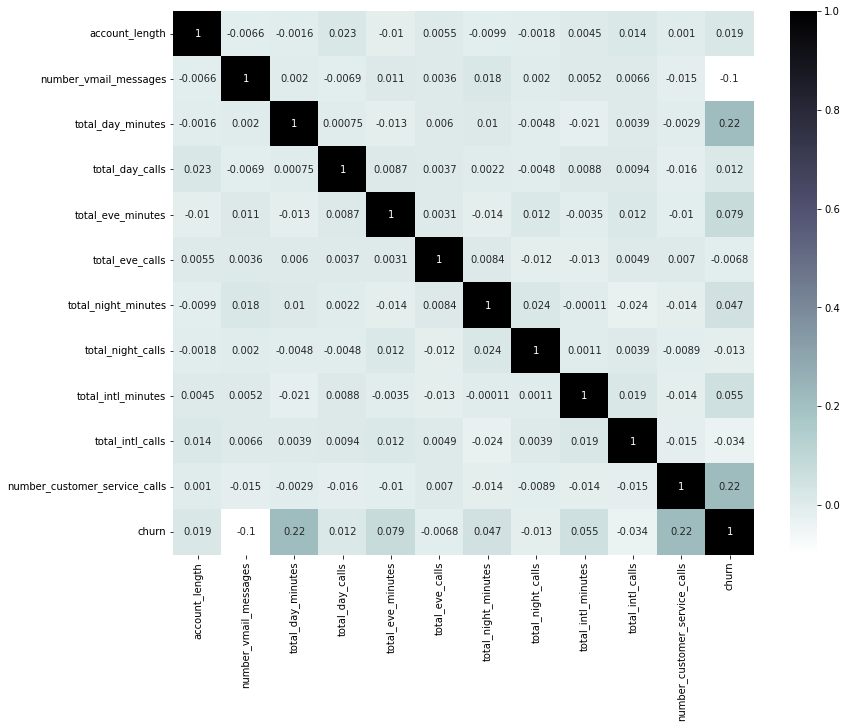

In [46]:
#Terdapat beberapa variabel feature yang berkorelasi tinggi maka harus didrop
df_train.drop(columns=['total_day_charge', 'total_eve_charge','total_night_charge','total_intl_charge'],inplace=True)
df_train['churn']=df_train['churn'].astype('category').cat.codes
corr = df_train.corr()
fig, ax = plt.subplots(figsize=(13,10))
sns.heatmap(corr, cmap='bone_r', annot=True, ax=ax);

#DATA PROCESSING

##Outliers Detection

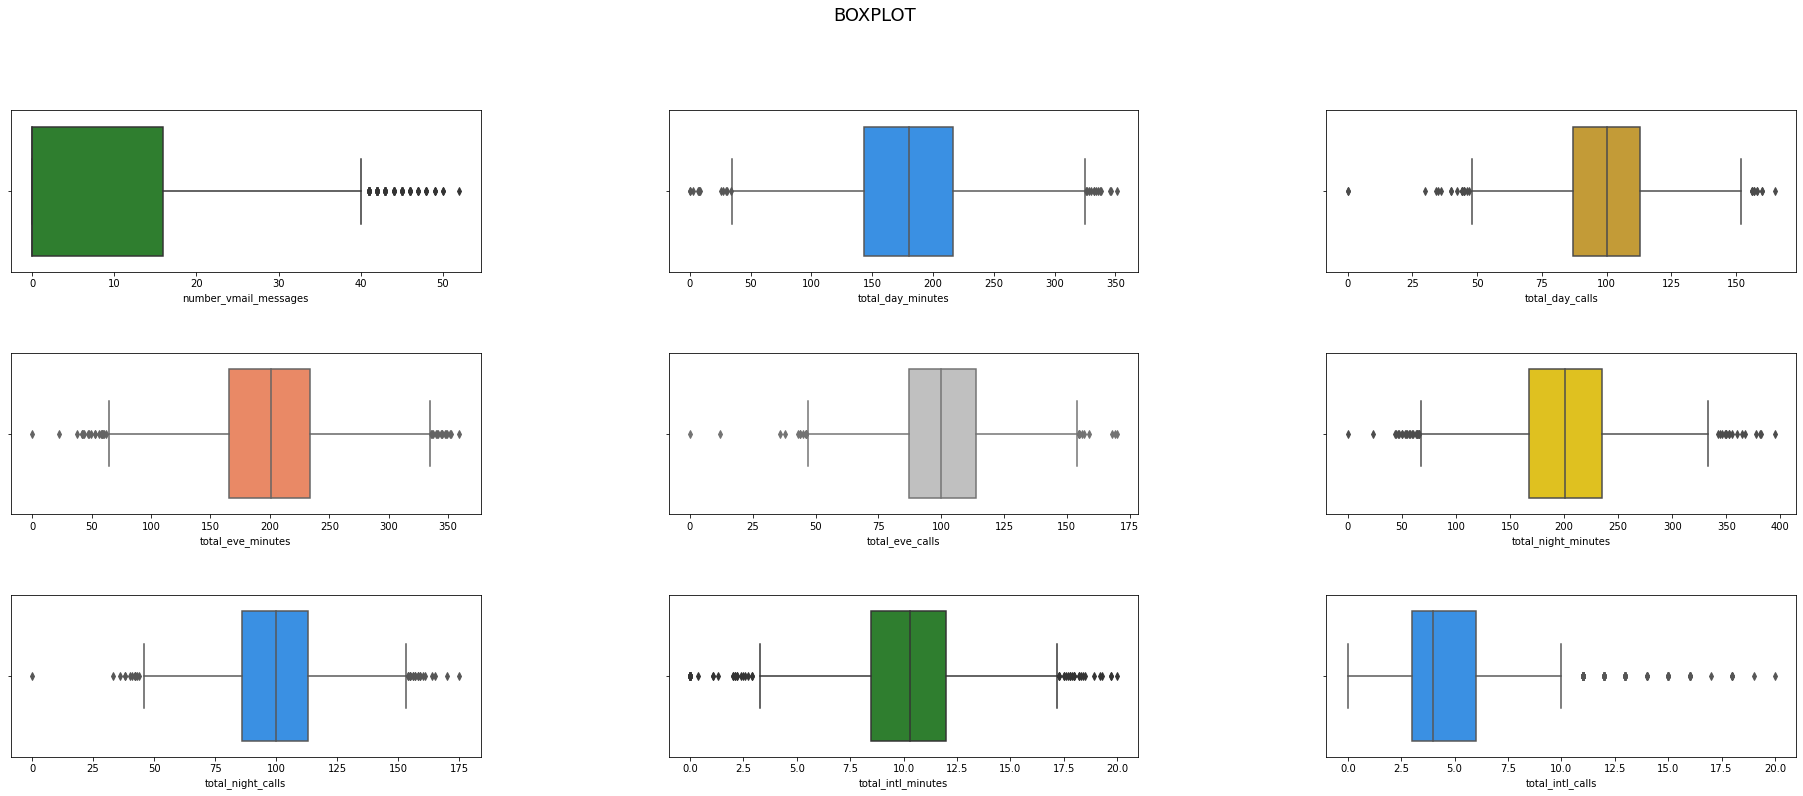

In [47]:
#numeric columns after removing correlation between feature
for col in df_train.columns:
  cleaned_columns = ['number_vmail_messages' ,'total_day_minutes' ,'total_day_calls', 'total_eve_minutes', 'total_eve_calls',
        'total_night_minutes', 'total_night_calls', 'total_intl_minutes', 'total_intl_calls']
#create figure 
fig = plt.figure(figsize=[32,24])
fig.suptitle('BOXPLOT', fontsize=18)
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(cleaned_columns):  
    ax1 = fig.add_subplot(6,3, i+1);
    ax1 = sns.boxplot(data = df_train, x=col ,  color= colours[i]);

###Removing Outliers

In [52]:
dict={}
print(f'Jumlah baris sebelum memfilter outlier: {len(df_train)}')

filtered_entries = np.array([True] * len(df_train))
for col in cleaned_columns:
    percentile25 = df_train[col].quantile(0.25)
    percentile75 = df_train[col].quantile(0.75)
    IQR  = percentile75 - percentile25 
    upper_limit = percentile75 + 1.5 * IQR 
    lower_limit = percentile25 - 1.5 * IQR
    dict['upper_limit'+ '_' + col] = upper_limit
    dict['lower_limit'+ '_' + col] = lower_limit 
    filtered_entries = ((df_train[col] >= lower_limit) & (df_train[col] <= upper_limit)) & filtered_entries
    
df_train = df_train[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df_train)}')

Jumlah baris sebelum memfilter outlier: 3840
Jumlah baris setelah memfilter outlier: 2743


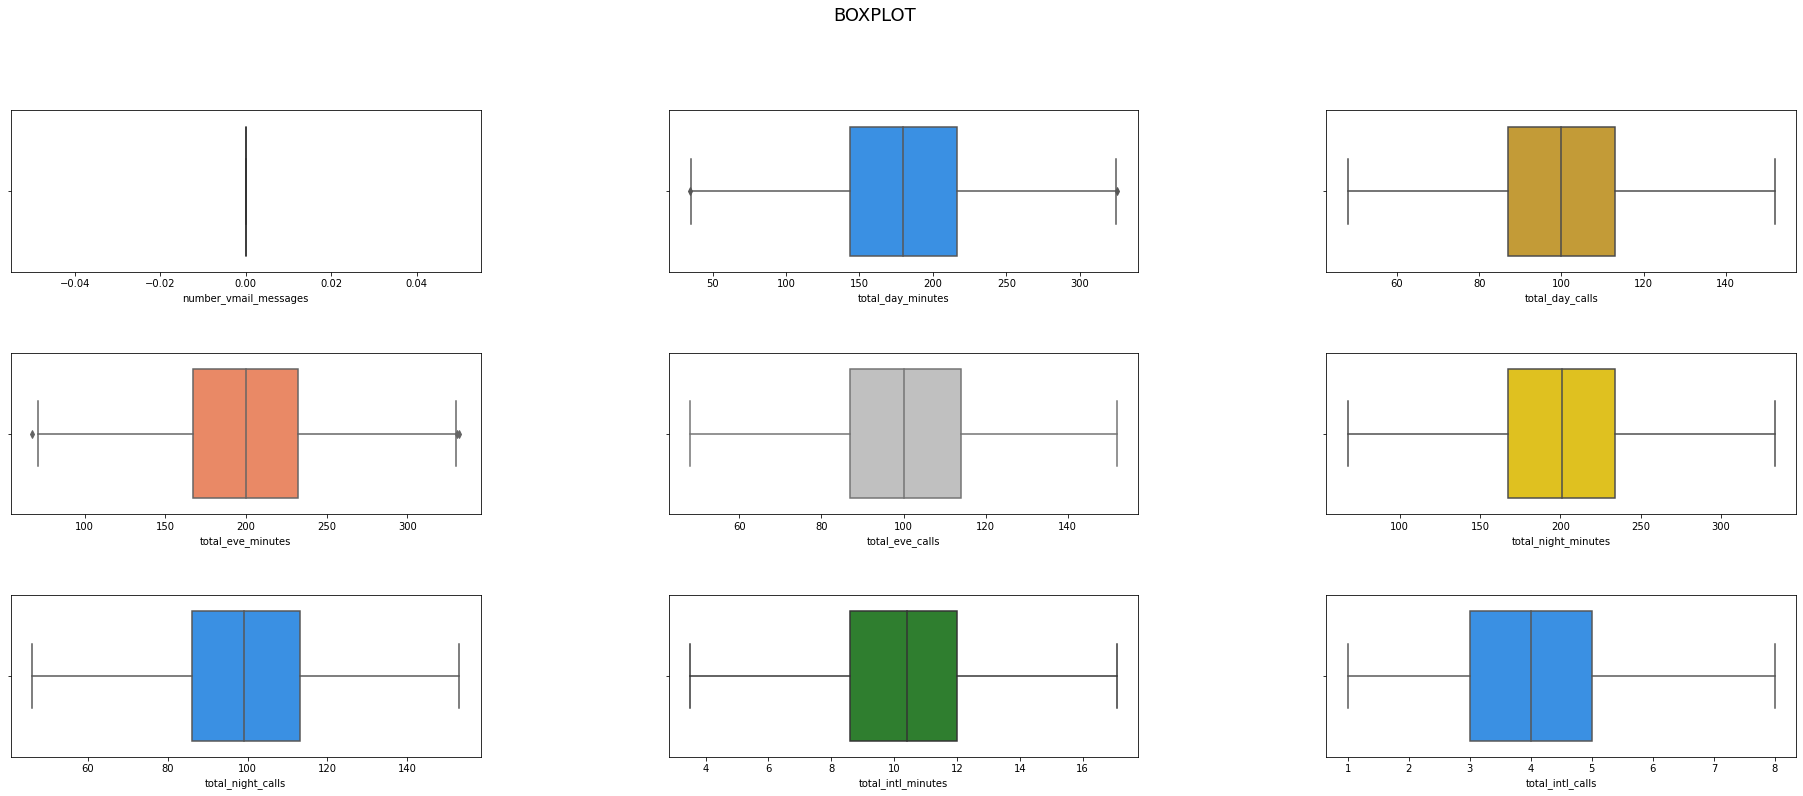

In [53]:
for col in cleaned_columns:
    df_train[col] = np.where(
        df_train[col] > dict['upper_limit_' + col],
        dict['upper_limit_' + col],
        np.where(
            df_train[col] < dict['lower_limit_' + col],
            dict['lower_limit_' + col],
            df_train[col]  
        )
    )
fig = plt.figure(figsize=[32,24])
fig.suptitle('BOXPLOT', fontsize=18)
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(cleaned_columns):  
    ax1 = fig.add_subplot(6,3, i+1);
    ax1 = sns.boxplot(data = df_train, x=col ,  color= colours[i]);

##One Hot Encoding

In [54]:
df_train.head()

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,number_customer_service_calls,churn
1,137,area_code_415,no,no,0.0,243.4,114.0,121.2,110.0,162.6,104.0,12.2,5.0,0,0
3,75,area_code_415,yes,no,0.0,166.7,113.0,148.3,122.0,186.9,121.0,10.1,3.0,3,0
5,147,area_code_415,yes,no,0.0,157.0,79.0,103.1,94.0,211.8,96.0,7.1,6.0,0,0
8,65,area_code_415,no,no,0.0,129.1,137.0,228.5,83.0,208.8,111.0,12.7,6.0,4,1
9,74,area_code_415,no,no,0.0,187.7,127.0,163.4,148.0,196.0,94.0,9.1,5.0,0,0


In [55]:
df_train = pd.get_dummies(df_train)
df_train.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,number_customer_service_calls,churn,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes
1,137,0.0,243.4,114.0,121.2,110.0,162.6,104.0,12.2,5.0,0,0,0,1,0,1,0,1,0
3,75,0.0,166.7,113.0,148.3,122.0,186.9,121.0,10.1,3.0,3,0,0,1,0,0,1,1,0
5,147,0.0,157.0,79.0,103.1,94.0,211.8,96.0,7.1,6.0,0,0,0,1,0,0,1,1,0
8,65,0.0,129.1,137.0,228.5,83.0,208.8,111.0,12.7,6.0,4,1,0,1,0,1,0,1,0
9,74,0.0,187.7,127.0,163.4,148.0,196.0,94.0,9.1,5.0,0,0,0,1,0,1,0,1,0


##Train-Test Split

In [56]:
from sklearn.model_selection import train_test_split 
X = df_train.drop('churn',axis=1).values
y = df_train['churn'].values
# splitting tha data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape)


(1920, 18) (823, 18)


##Normalization

In [57]:
from sklearn.preprocessing import MinMaxScaler
# creating the object of minmax scaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
df_train.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,number_customer_service_calls,churn,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes
count,2743.000000,2743.0,2743.000000,2743.000000,2743.000000,2743.000000,2743.000000,2743.000000,2743.000000,2743.000000,2743.000000,2743.000000,2743.000000,2743.000000,2743.000000,2743.000000,2743.000000,2743.000000,2743.000000
mean,99.763762,0.0,179.922858,100.052862,200.004156,100.184105,200.474553,99.368210,10.306416,4.022968,1.588042,0.160773,0.257018,0.488152,0.254830,0.908130,0.091870,0.999635,0.000365
std,39.989162,0.0,52.998404,19.205645,48.206360,19.255869,48.695368,19.569977,2.529526,1.792231,1.322322,0.367388,0.437069,0.499951,0.435845,0.288895,0.288895,0.019094,0.019094
min,1.000000,0.0,34.500000,48.000000,67.500000,48.000000,67.700000,46.000000,3.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.0,143.600000,87.000000,167.050000,87.000000,167.450000,86.000000,8.600000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,99.000000,0.0,179.700000,100.000000,200.200000,100.000000,201.000000,99.000000,10.400000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,126.000000,0.0,216.250000,113.000000,232.450000,114.000000,234.250000,113.000000,12.000000,5.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,243.000000,0.0,325.500000,152.000000,332.100000,152.000000,333.500000,153.000000,17.100000,8.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##Modelling

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import NearestNeighbors


from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import roc_auc_score, accuracy_score,f1_score, precision_score

In [59]:
model_list = []
accuracy_list = []
precision_list = []
f1_score_list= []
roc_auc_list = []

In [60]:
def ML (alg, name_model): #y_train_alg, y_test_alg):
  
  alg_model = alg().fit(X_train, y_train)
  print(alg_model)
  y_train_alg = alg_model.predict(X_train)
  y_test_alg = alg_model.predict(X_test)

  pred(X_train, y_train, alg_model, 'Training', name_model, y_train_alg)
  pred(X_test, y_test, alg_model, 'Testing', name_model, y_test_alg)

  accuracy, precision, f1_s, roc_auc_sc= round(accuracy_score(y_test , y_test_alg) , 3) , round(precision_score(y_test , y_test_alg) , 3) , round(f1_score(y_test , y_test_alg) , 3), round(roc_auc_score(y_test, y_test_alg),3)
  print(f'Test Accuracy Score is :{accuracy}')
  print(f'Test Precision Score is :{precision}')
  print(f'f1  Score is :{f1_s}')
  print(f'ROC AUC Score is :{roc_auc_sc}')
  model_list.append(name_model)
  accuracy_list.append(accuracy)
  precision_list.append(precision)
  f1_score_list.append(f1_s)
  roc_auc_list.append(roc_auc_sc)
  return(alg_model)

In [61]:
def pred (x_data, y_data, alg_model, type, name_model, y_pred_alg):

  # print classification report
  print('\nClassification Report %s' % type, ' Model:')
  print(classification_report(y_data, y_pred_alg))

  # form confusion matrix as a dataFrame
  confusion_matrix_alg = pd.DataFrame((confusion_matrix(y_data, y_pred_alg)), ('Non Churn', 'Churn'),('Non Churn', 'Churn'))

  # plot confusion matrix
  plt.figure()
  heatmap = sns.heatmap(confusion_matrix_alg, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
  heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
  heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

  plt.title('Confusion Matrix for %s Model \n%s '% (type,name_model),fontsize=18, color='black')
  plt.ylabel('True label', fontsize=14)
  plt.xlabel('Predicted label', fontsize=14)
  plt.show()

##Neural Network

MLPClassifier()

Classification Report Training  Model:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1625
           1       0.88      0.58      0.70       295

    accuracy                           0.92      1920
   macro avg       0.90      0.78      0.83      1920
weighted avg       0.92      0.92      0.92      1920



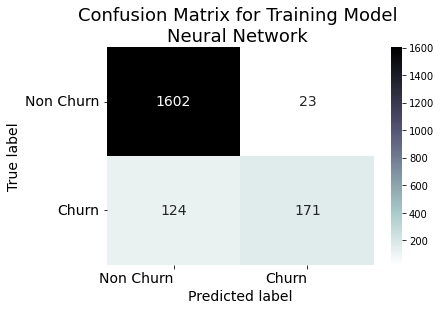


Classification Report Testing  Model:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       677
           1       0.87      0.51      0.65       146

    accuracy                           0.90       823
   macro avg       0.89      0.75      0.79       823
weighted avg       0.90      0.90      0.89       823



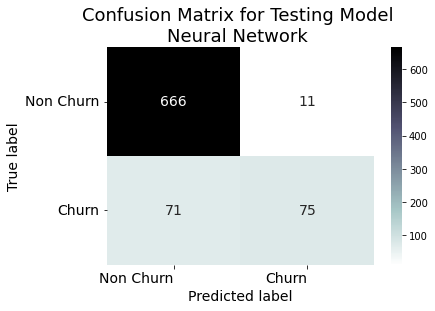

Test Accuracy Score is :0.9
Test Precision Score is :0.872
f1  Score is :0.647
ROC AUC Score is :0.749


In [62]:
model_nn = ML(MLPClassifier, 'Neural Network')

##Support Vector Machine(SVM)

SVC()

Classification Report Training  Model:
              precision    recall  f1-score   support

           0       0.87      0.99      0.93      1625
           1       0.76      0.18      0.30       295

    accuracy                           0.87      1920
   macro avg       0.82      0.59      0.61      1920
weighted avg       0.85      0.87      0.83      1920



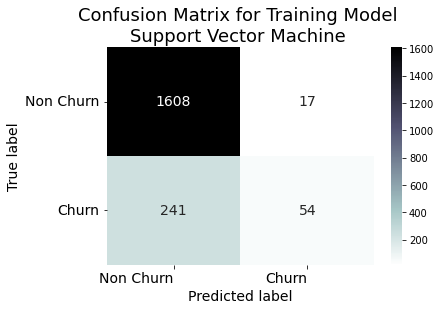


Classification Report Testing  Model:
              precision    recall  f1-score   support

           0       0.84      0.98      0.91       677
           1       0.65      0.15      0.24       146

    accuracy                           0.83       823
   macro avg       0.74      0.57      0.58       823
weighted avg       0.81      0.83      0.79       823



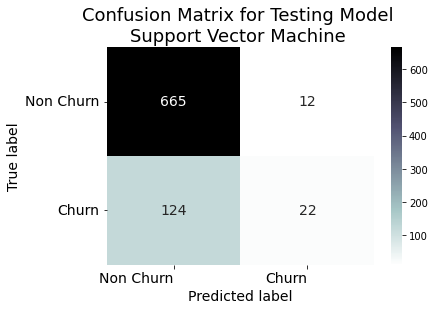

Test Accuracy Score is :0.835
Test Precision Score is :0.647
f1  Score is :0.244
ROC AUC Score is :0.566


In [63]:
model_svm = ML(SVC, 'Support Vector Machine')

##Logistic Regression

LogisticRegression()

Classification Report Training  Model:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1625
           1       0.65      0.19      0.29       295

    accuracy                           0.86      1920
   macro avg       0.76      0.58      0.61      1920
weighted avg       0.84      0.86      0.83      1920



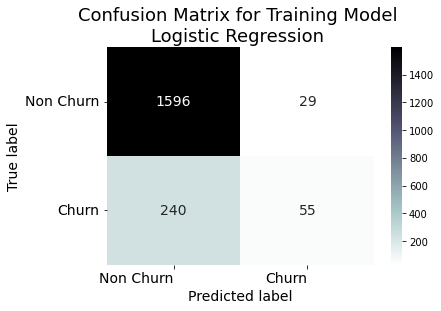


Classification Report Testing  Model:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       677
           1       0.73      0.28      0.41       146

    accuracy                           0.85       823
   macro avg       0.80      0.63      0.66       823
weighted avg       0.84      0.85      0.83       823



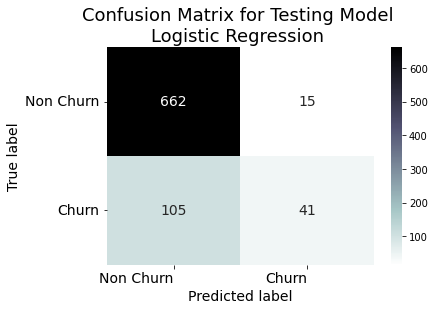

Test Accuracy Score is :0.854
Test Precision Score is :0.732
f1  Score is :0.406
ROC AUC Score is :0.629


In [64]:
model_lr = ML(LogisticRegression, 'Logistic Regression')

##Naive Bayes

GaussianNB()

Classification Report Training  Model:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00      1625
           1       0.15      1.00      0.27       295

    accuracy                           0.15      1920
   macro avg       0.58      0.50      0.13      1920
weighted avg       0.87      0.15      0.04      1920



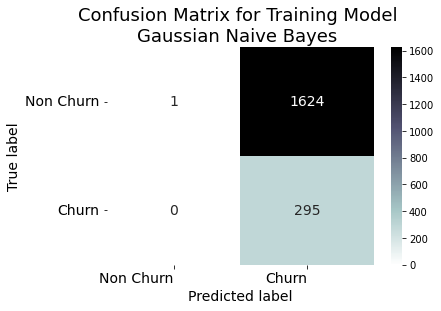


Classification Report Testing  Model:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       677
           1       0.18      1.00      0.30       146

    accuracy                           0.18       823
   macro avg       0.09      0.50      0.15       823
weighted avg       0.03      0.18      0.05       823



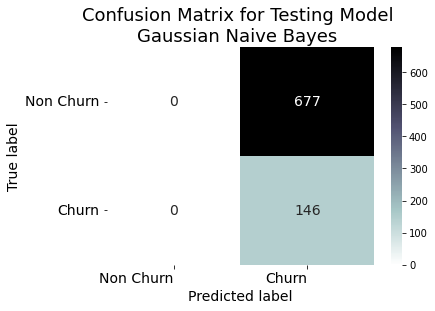

Test Accuracy Score is :0.177
Test Precision Score is :0.177
f1  Score is :0.301
ROC AUC Score is :0.5


In [65]:
model_gnb = ML(GaussianNB, 'Gaussian Naive Bayes')

##Decision Tree

DecisionTreeClassifier()

Classification Report Training  Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1625
           1       1.00      1.00      1.00       295

    accuracy                           1.00      1920
   macro avg       1.00      1.00      1.00      1920
weighted avg       1.00      1.00      1.00      1920



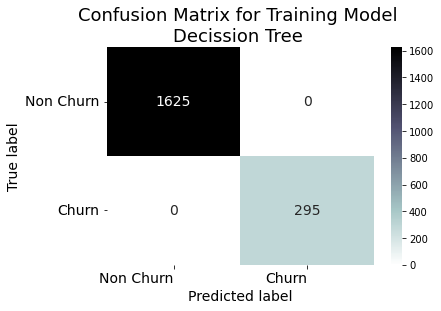


Classification Report Testing  Model:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       677
           1       0.74      0.72      0.73       146

    accuracy                           0.91       823
   macro avg       0.84      0.83      0.84       823
weighted avg       0.91      0.91      0.91       823



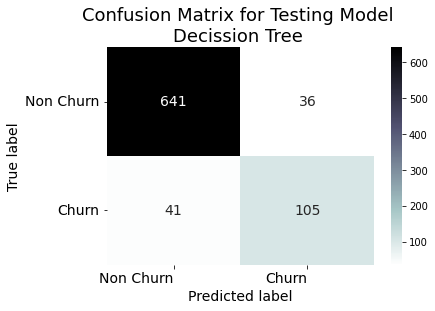

Test Accuracy Score is :0.906
Test Precision Score is :0.745
f1  Score is :0.732
ROC AUC Score is :0.833


In [66]:
model_dt = ML(DecisionTreeClassifier, 'Decission Tree')

##Method Comparison

In [67]:
dict = {'Model':model_list, 'Accuracy':accuracy_list , 'Precision':precision_list,'f1_score':f1_score_list , 'ROC_AUC_score':roc_auc_list}
model_df = pd.DataFrame(dict).sort_values(ascending= False , by = 'Accuracy')
model_df

,Model,Accuracy,Precision,f1_score,ROC_AUC_score
4,Decission Tree,0.906,0.745,0.732,0.833
0,Neural Network,0.900,0.872,0.647,0.749
2,Logistic Regression,0.854,0.732,0.406,0.629
1,Support Vector Machine,0.835,0.647,0.244,0.566
3,Gaussian Naive Bayes,0.177,0.177,0.301,0.500


#PREDICTION BASED ON BEST MODEL

##Import Dataset

In [68]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv


##Read Dataset

In [69]:
import numpy as np
import pandas as pd
df_test=pd.read_csv('test.csv')
df_test.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


##Data Processing

###Missing Value Detection

In [70]:
df_test.isnull().sum()

id                               0
state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
dtype: int64

###Duplicate Data Detection

In [71]:
df_test.duplicated().sum()

0

###Dropping

In [72]:
df_test.drop(columns=['state','id','total_day_charge', 'total_eve_charge','total_night_charge','total_intl_charge'], inplace=True)

###Outliers

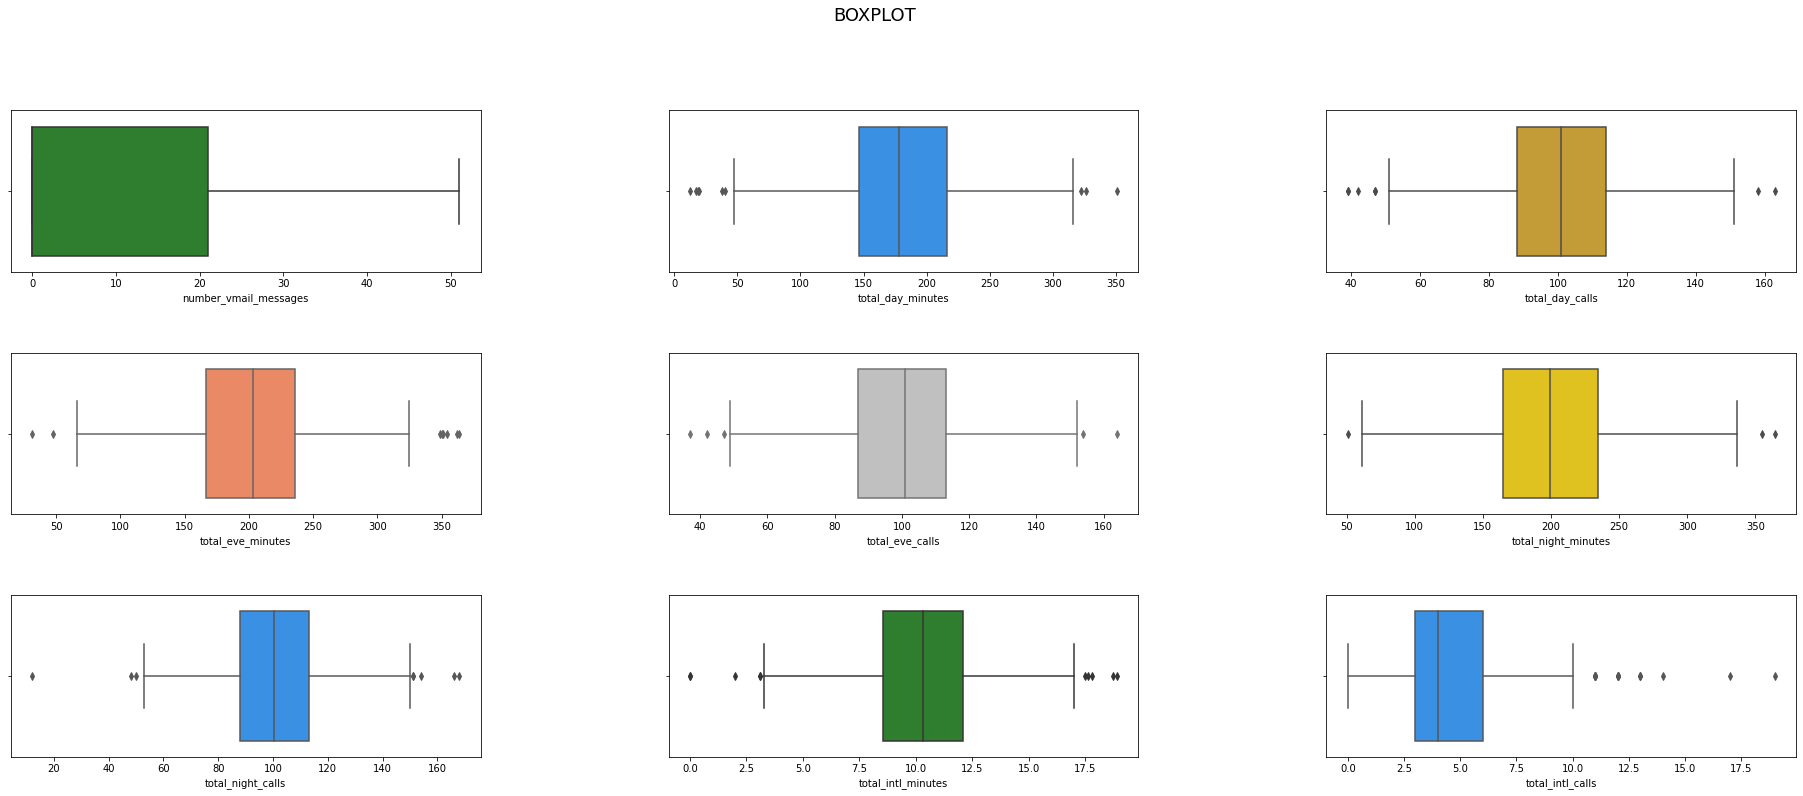

In [73]:
#create figure 
fig = plt.figure(figsize=[32,24])
fig.suptitle('BOXPLOT', fontsize=18)
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(cleaned_columns):  
    ax1 = fig.add_subplot(6,3, i+1);
    ax1 = sns.boxplot(data = df_test, x=col ,  color= colours[i]);

In [74]:
dict = {}
print(f'Jumlah baris sebelum memfilter outlier: {len(df_test)}')

filtered_entries = np.array([True] * len(df_test))
for col in cleaned_columns:
    percentile25 = df_test[col].quantile(0.25)
    percentile75 = df_test[col].quantile(0.75)
    IQR  = percentile75 - percentile25 
    upper_limit = percentile75 + 1.5 * IQR 
    lower_limit = percentile25 - 1.5 * IQR
    dict['upper_limit'+ '_' + col] = upper_limit
    dict['lower_limit'+ '_' + col] = lower_limit
    filtered_entries = ((df_test[col] >= lower_limit) & (df_test[col] <= upper_limit)) & filtered_entries
    
df_test = df_test[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df_test)}') 

Jumlah baris sebelum memfilter outlier: 750
Jumlah baris setelah memfilter outlier: 682


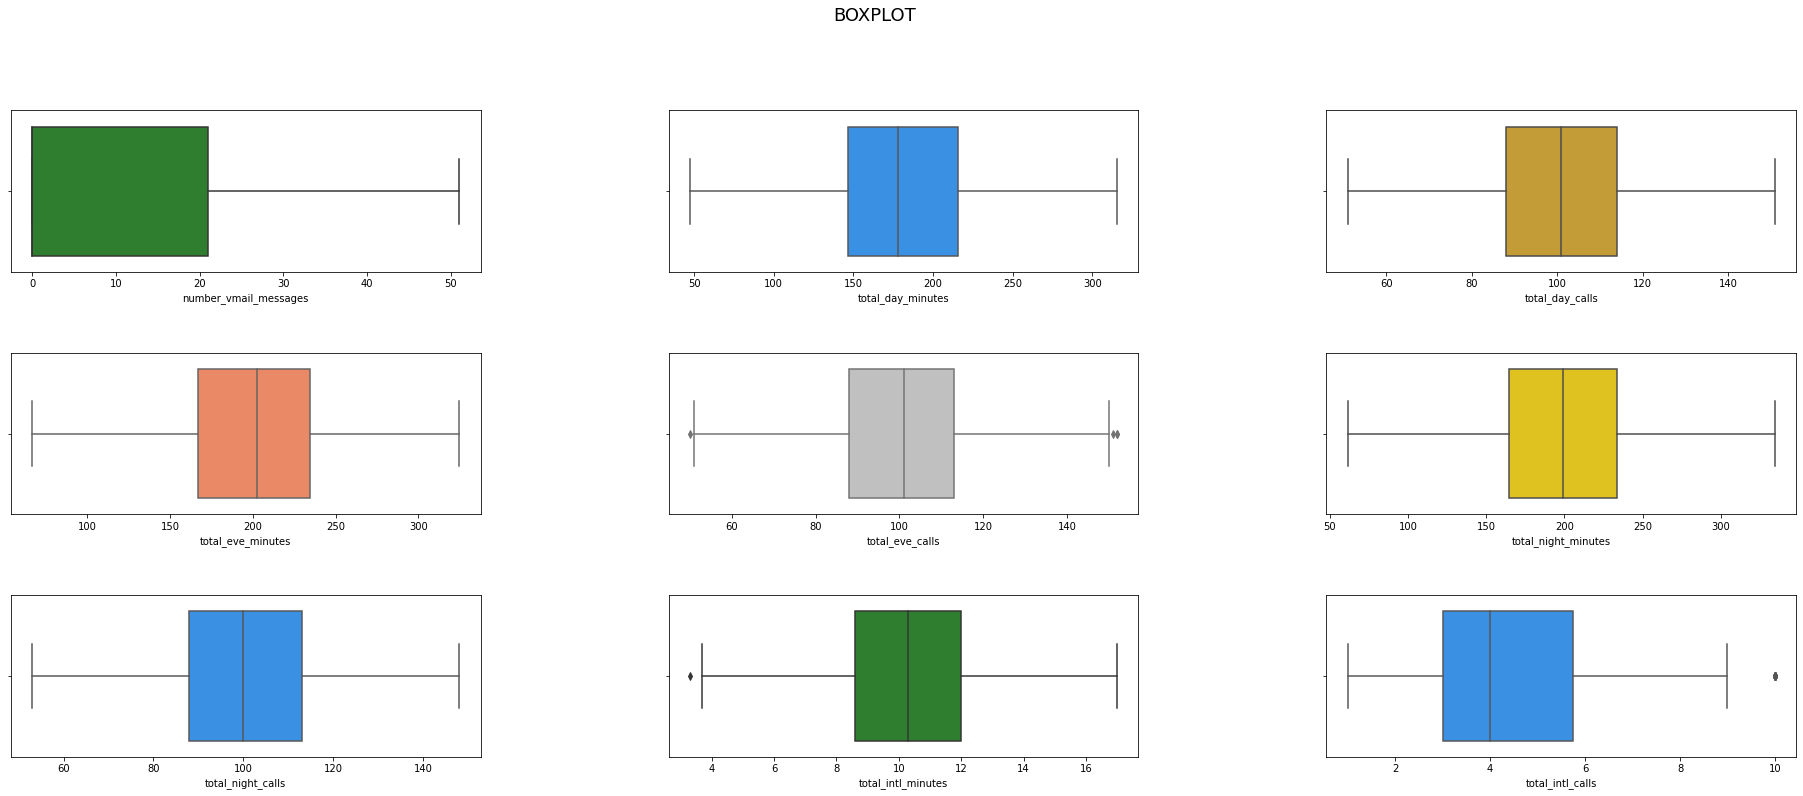

In [76]:
for col in cleaned_columns:
    df_test[col] = np.where(
        df_test[col] > dict['upper_limit_' + col],
        dict['upper_limit_' + col],
        np.where(
            df_test[col] < dict['lower_limit_' + col],
            dict['lower_limit_' + col],
            df_test[col]  
        )
    )
fig = plt.figure(figsize=[32,24])
fig.suptitle('BOXPLOT', fontsize=18)
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(cleaned_columns):  
    ax1 = fig.add_subplot(6,3, i+1);
    ax1 = sns.boxplot(data = df_test, x=col ,  color= colours[i]);

###One Hot Encoding

In [77]:
df_test.head()

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,number_customer_service_calls
0,128,area_code_415,no,yes,25.0,265.1,110.0,197.4,99.0,244.7,91.0,10.0,3.0,1
1,118,area_code_510,yes,no,0.0,223.4,98.0,220.6,101.0,203.9,118.0,6.3,6.0,0
2,62,area_code_415,no,no,0.0,120.7,70.0,307.2,76.0,203.0,99.0,13.1,6.0,4
3,93,area_code_510,no,no,0.0,190.7,114.0,218.2,111.0,129.6,121.0,8.1,3.0,3
4,174,area_code_415,no,no,0.0,124.3,76.0,277.1,112.0,250.7,115.0,15.5,5.0,3


In [78]:
df_test = pd.get_dummies(df_test)
df_test.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,number_customer_service_calls,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes
0,128,25.0,265.1,110.0,197.4,99.0,244.7,91.0,10.0,3.0,1,0,1,0,1,0,0,1
1,118,0.0,223.4,98.0,220.6,101.0,203.9,118.0,6.3,6.0,0,0,0,1,0,1,1,0
2,62,0.0,120.7,70.0,307.2,76.0,203.0,99.0,13.1,6.0,4,0,1,0,1,0,1,0
3,93,0.0,190.7,114.0,218.2,111.0,129.6,121.0,8.1,3.0,3,0,0,1,1,0,1,0
4,174,0.0,124.3,76.0,277.1,112.0,250.7,115.0,15.5,5.0,3,0,1,0,1,0,1,0


###Normalization

In [79]:
features = ['account_length','number_vmail_messages','total_day_minutes','total_day_calls','total_eve_minutes','total_eve_calls','total_night_minutes','total_night_calls','total_intl_minutes','total_intl_calls','number_customer_service_calls','area_code_area_code_408','area_code_area_code_415','area_code_area_code_510','international_plan_no','international_plan_yes','voice_mail_plan_no','voice_mail_plan_yes']
X_testing = df_test[[x for x in features]]

In [80]:
from sklearn.preprocessing import MinMaxScaler
# creating the object of minmax scaler
# df_test['number_vmail_messages'] = MinMaxScaler().fit_transform(df_test['number_vmail_messages'].values.reshape(len(df_test), 1))
# df_test['total_day_calls'] = MinMaxScaler().fit_transform(df_test['total_day_calls'].values.reshape(len(df_test), 1))
scaler = MinMaxScaler()
X_testing= scaler.fit_transform(X_testing)
df_test.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,number_customer_service_calls,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes
count,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000
mean,99.919355,8.646628,180.924780,100.991202,201.947067,100.618768,199.298680,100.011730,10.293402,4.307918,1.640762,0.228739,0.519062,0.252199,0.897361,0.102639,0.715543,0.284457
std,40.004122,14.335493,50.616332,18.828929,49.772959,18.642509,50.397601,18.060345,2.584416,2.031086,1.272658,0.420329,0.500003,0.434594,0.303710,0.303710,0.451487,0.451487
min,1.000000,0.000000,47.400000,51.000000,66.500000,50.000000,61.400000,53.000000,3.300000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,146.725000,88.000000,167.100000,88.000000,164.700000,88.000000,8.600000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,101.000000,0.000000,178.050000,101.000000,202.700000,101.000000,199.100000,100.000000,10.300000,4.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,125.000000,21.000000,215.475000,114.000000,234.650000,113.000000,233.575000,113.000000,12.000000,5.750000,2.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,238.000000,51.000000,315.600000,151.000000,324.800000,152.000000,334.700000,148.000000,17.000000,10.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


###Prediction 

In [81]:
y_pred_dt = model_dt.predict(X_testing)
print(y_pred_dt)

[1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0
 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0
 0 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 1 1 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1
 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0
 1 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 1
 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0
 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0
 1 1 0 1 1 0 0 0 0 0 1 0 

###Input Prediction Value into Data Test

In [83]:
pd.Series
res= pd.Series(y_pred_dt)
res

0      1
1      0
2      1
3      0
4      1
      ..
677    0
678    0
679    0
680    0
681    0
Length: 682, dtype: int8

In [84]:
res_df=pd.DataFrame()

In [85]:
res_df['churn']=list(res)
res_df.head()

,churn
0,1
1,0
2,1
3,0
4,1


In [87]:
res_df['churn'].value_counts()

0    515
1    167
Name: churn, dtype: int64

In [86]:
res_df.to_csv('res.csv', index=False)